*This tutorial will show you how to use the optoConn library based on 12/10/2016 version.*

** NOTE: Depending on the datastructure, the optoConnMain.py file will need to be adjusted so as to import properly the data. See rawFormating_simul.py for an example as to how to format the data. **

## Importing relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from optoConn        import optoConnMain as OCM
from optoConn.graphs import plotfit
from optoConn.tools  import *

import tensorflow as tf

%matplotlib inline

## Download data

Download the example data at ; https://drive.google.com/open?id=0Bzl7KJRwuR48RVRWLXRRMmNJWm8
and unzip it. You should save this npy file in optoConn/data. Make sure the name of the dataset
is the same as defined in the argument dictionnary below

## Independance model
*Predicting whether neuron i was stimulated based on neuron j*

** The first thing to do is to specify the data and model parameters. The description of all the parameters can be found in optoConnMain.py. **

In [2]:
argDict = {  '_mPath'   : '/groups/turaga/home/castonguayp/research/optoConn/', #Repository directory          ,
             'dataset'  : 'stblock_N01_30Hz_25obs_20spar_Opto.npy',             #Data file to use in data/
             'saveName' : 'nn.ckpt',                                            #Save parameters to name
           
             'cells'      : [54,68],
             'seqRange'   : [[-5, 0],[0,20]], #From 5 to 0 timepoints before stim and 0 to 20 after stim
             'prepMethod' : 5,                 #Data preparation method. See optoConnMain.py for more info. 

             'nbIters'    : 1500,    #Number of iteration 
             'learnRate'  : 0.0005,  #Learning rate
             'batchSize'  : 1,       #Current, HAS to be set to 1 for classfication models, but is in fact 2. 
             'keepProb'   : 0.5,     #Keeping probability for dropout regularizer
             'sparsW'     :.0000001, #Needs to be close to 0 size we are already using backprop
           
             'nhidclassi' : 50,         #Number of hidden neurons per layer
             'multiLayer' : 3,          #Number of layers
             'actfct'     : tf.nn.tanh, #Transfer function

             'detail'     : True, 
            }

** Now we can run the model. **

In [3]:
G,D,L = OCM.simul(argDict, run = True)

Stimulated cell : 54
Decoding cell   : 68

 Iter: 0/1500   ~  Tr Loss: 1.405528   ~  Tr Acc: 48.50   |  Te Loss: 1.398591   ~  Te Acc 47.80
 Iter: 100/1500   ~  Tr Loss: 1.372285   ~  Tr Acc: 48.90   |  Te Loss: 1.378514   ~  Te Acc 49.30
 Iter: 200/1500   ~  Tr Loss: 1.375818   ~  Tr Acc: 48.90   |  Te Loss: 1.405158   ~  Te Acc 48.00
 Iter: 300/1500   ~  Tr Loss: 1.342844   ~  Tr Acc: 49.70   |  Te Loss: 1.319749   ~  Te Acc 50.00
 Iter: 400/1500   ~  Tr Loss: 1.214008   ~  Tr Acc: 53.80   |  Te Loss: 1.025509   ~  Te Acc 53.50
 Iter: 500/1500   ~  Tr Loss: 1.606002   ~  Tr Acc: 57.50   |  Te Loss: 1.503965   ~  Te Acc 58.50
 Iter: 600/1500   ~  Tr Loss: 1.667255   ~  Tr Acc: 62.40   |  Te Loss: 1.956687   ~  Te Acc 64.10
 Iter: 700/1500   ~  Tr Loss: 1.788141   ~  Tr Acc: 68.10   |  Te Loss: 1.581625   ~  Te Acc 70.40
 Iter: 800/1500   ~  Tr Loss: 2.019485   ~  Tr Acc: 72.10   |  Te Loss: 1.871995   ~  Te Acc 75.30
 Iter: 900/1500   ~  Tr Loss: 0.505726   ~  Tr Acc: 74.80   |  Te Lo

** With the cells 54 & 68, it seems that the classification is performing above chance. To make sure of this, we can try the same simulation but by shuffling the labels. **

In [8]:
argDict['null'] = True  #Using a null model

G,D,L = OCM.simul(argDict, run = True)

Stimulated cell : 54
Decoding cell   : 68

 Iter: 0/1500   ~  Tr Loss: 1.610762   ~  Tr Acc: 51.40   |  Te Loss: 1.602036   ~  Te Acc 51.40
 Iter: 100/1500   ~  Tr Loss: 1.460425   ~  Tr Acc: 51.40   |  Te Loss: 1.425725   ~  Te Acc 51.80
 Iter: 200/1500   ~  Tr Loss: 1.436905   ~  Tr Acc: 51.20   |  Te Loss: 1.521803   ~  Te Acc 51.80
 Iter: 300/1500   ~  Tr Loss: 1.350692   ~  Tr Acc: 51.70   |  Te Loss: 1.390275   ~  Te Acc 49.00
 Iter: 400/1500   ~  Tr Loss: 1.491593   ~  Tr Acc: 51.80   |  Te Loss: 1.363568   ~  Te Acc 48.50
 Iter: 500/1500   ~  Tr Loss: 1.325717   ~  Tr Acc: 49.40   |  Te Loss: 1.432164   ~  Te Acc 50.10
 Iter: 600/1500   ~  Tr Loss: 1.420066   ~  Tr Acc: 49.30   |  Te Loss: 1.372754   ~  Te Acc 49.70
 Iter: 700/1500   ~  Tr Loss: 1.468162   ~  Tr Acc: 49.50   |  Te Loss: 1.329829   ~  Te Acc 49.70
 Iter: 800/1500   ~  Tr Loss: 1.406781   ~  Tr Acc: 48.50   |  Te Loss: 1.322226   ~  Te Acc 50.10
 Iter: 900/1500   ~  Tr Loss: 1.466271   ~  Tr Acc: 47.40   |  Te Lo

** Comparing the scores obtained, it seems like cell 68 is able to predict above chance whether neuron 54 was stimulated, suggesting a connection. Being simulated data, we can verify if this connection actually exists. ** 

In [10]:
D['W'][67,53]

-6.3674075784427835

** Good! There is indeed a connection from neuron 54 to 68. Note that the model does not indicate the sign of the connection. It can also be good to look at the whole weight matrix to get a sense of the sparsity. **

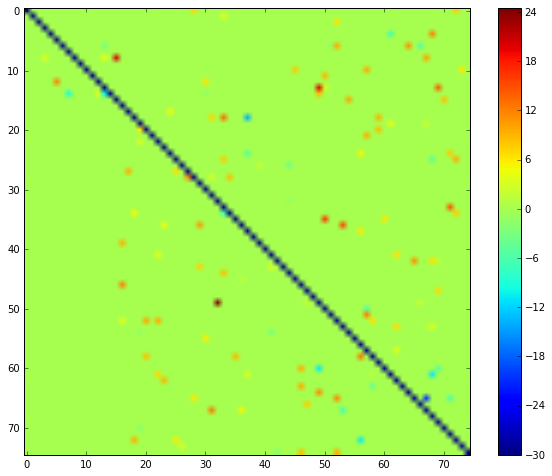

In [34]:
plt.figure(figsize = (10,8))
plt.imshow(D['W'], aspect = 'auto')
plt.colorbar()

** Now one would need to go over all possible ordered pair of neurons and repeat this multiple time to better evaluate the significance of this predicted connection. ConnInference_Classi_sim is an example script doing this. **